# Classification of plant phenotype

This is an example of a non-geospatial use of the MapReader pipeline

## Load

https://mapreader.readthedocs.io/en/latest/User-guide/Load.html

### Load images

In [37]:
from mapreader import loader

path2images = "./dataset/open_access_plant/*.png"
my_files = loader(path2images)

100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 77.27it/s]


In [38]:
# len() shows the total number of images currently read (or sliced, see below)
print(f"Number of images: {len(my_files)}")

Number of images: 2


In [39]:
print(my_files)

#images: 2

#parents: 2
2014-06-06_plant001_rgb.png
2014-07-17_plant047_rgb.png

#patches: 0



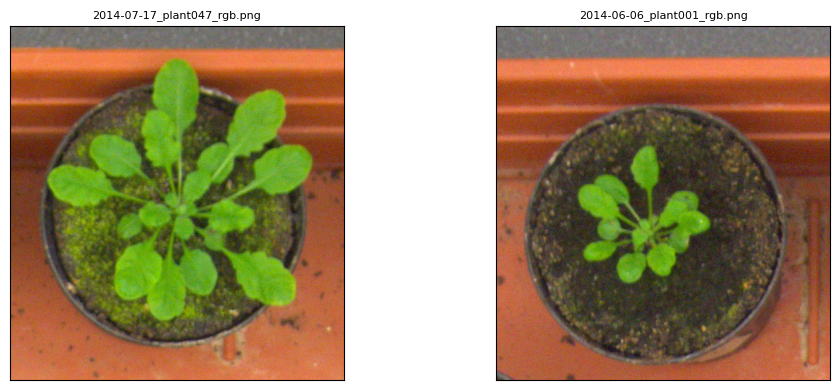

In [40]:
my_files.show_sample(num_samples=2, tree_level="parent")

### Patchify images

In [41]:
my_files.patchify_all(patch_size=50, square_cuts=False)  # in pixels

[INFO] Saving patches in directory named "patches_50_pixel".


100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 30.68it/s]


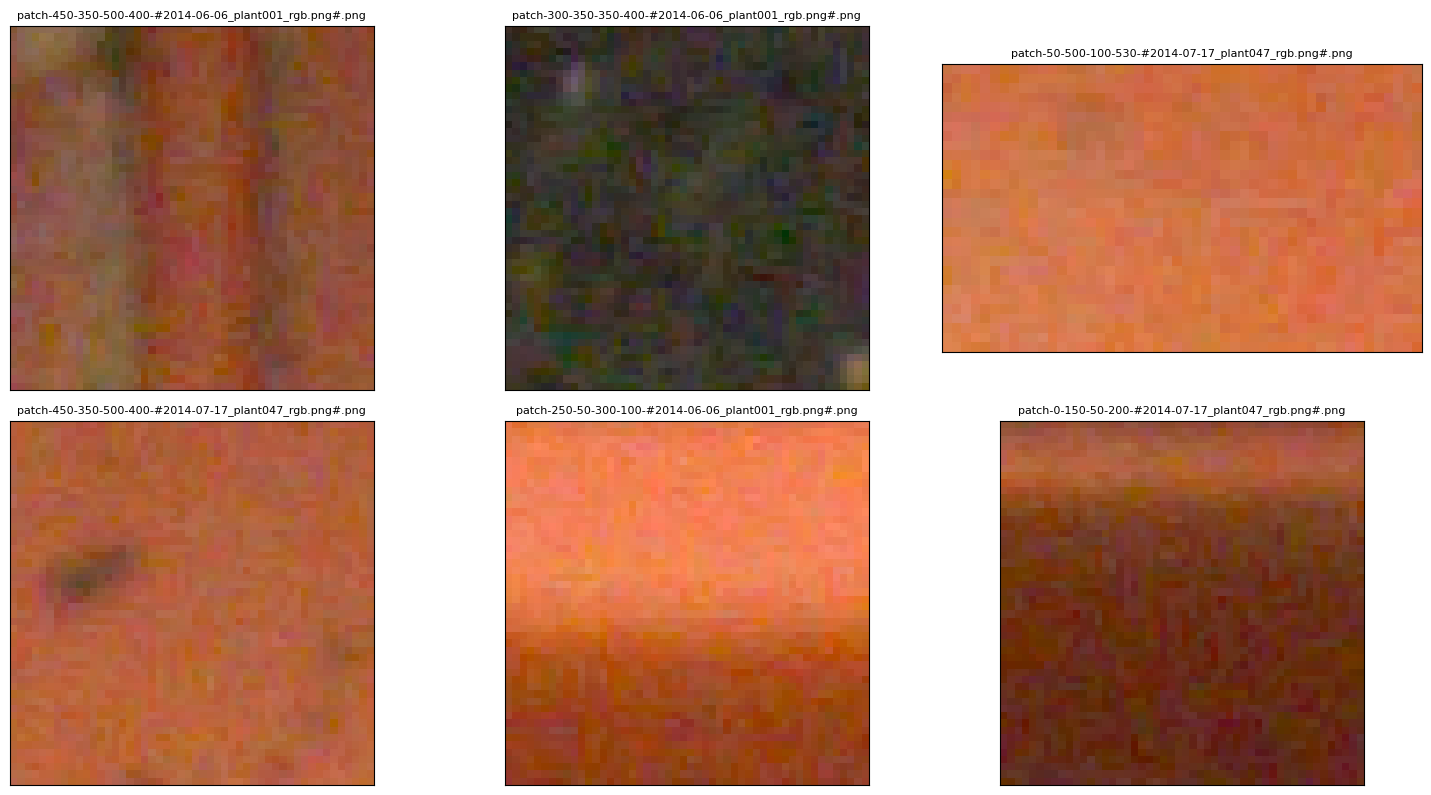

In [42]:
my_files.show_sample(num_samples=6, tree_level="patch")

In [43]:
parent_list = my_files.list_parents()
patch_list = my_files.list_patches()

100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.06it/s]


[<Figure size 1500x1500 with 1 Axes>]

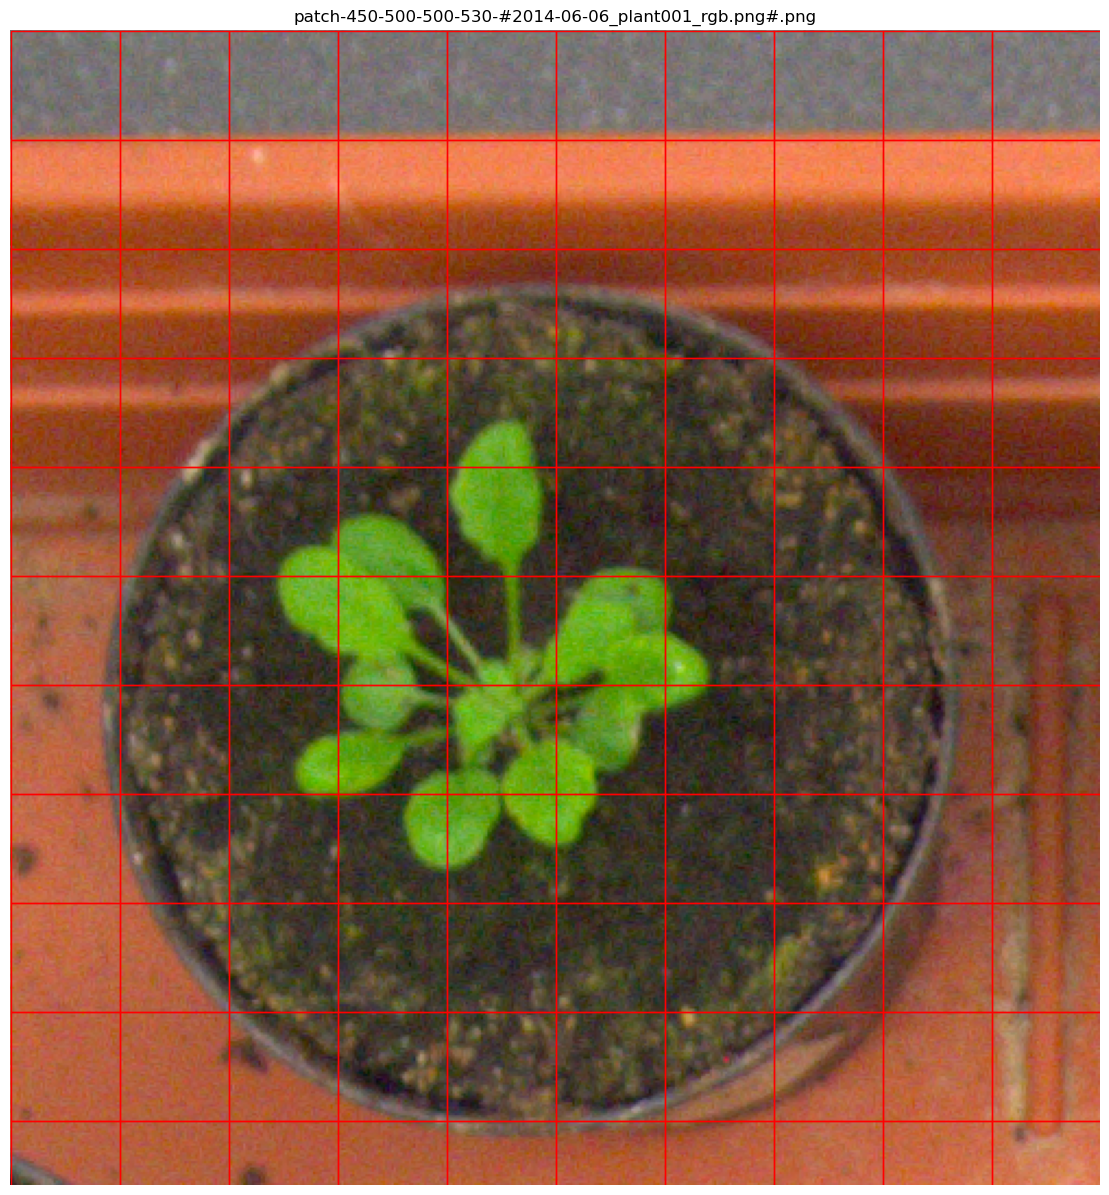

In [44]:
my_files.show_parent(
    parent_list[0], patch_border=True, plot_parent=True, figsize=(15, 15)
)

### Calculate pixel intensities

In [45]:
my_files.calc_pixel_stats()

100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 15.66it/s]


In [46]:
parent_df, patch_df = my_files.convert_images(save=True)

[INFO] Saved parent dataframe as "parent_df.csv"
[INFO] Saved patch dataframe as "patch_df.csv"


In [47]:
parent_df.head()

parent_id  \
image_id                                
2014-06-06_plant001_rgb.png      None   
2014-07-17_plant047_rgb.png      None   

                                                                    image_path  \
image_id                                                                         
2014-06-06_plant001_rgb.png  /Users/rwood/LwM/MapReader/worked_examples/non...   
2014-07-17_plant047_rgb.png  /Users/rwood/LwM/MapReader/worked_examples/non...   

                                     shape  \
image_id                                     
2014-06-06_plant001_rgb.png  (530, 500, 4)   
2014-07-17_plant047_rgb.png  (530, 500, 4)   

                                                                       patches  
image_id                                                                        
2014-06-06_plant001_rgb.png  [patch-0-0-50-50-#2014-06-06_plant001_rgb.png#...  
2014-07-17_plant047_rgb.png  [patch-0-0-50-50-#2014-07-17_plant047_rgb.png#...

In [48]:
patch_df.head()

parent_id  \
image_id                                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   2014-06-06_plant001_rgb.png   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  2014-06-06_plant001_rgb.png   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   

                                                                                           image_path  \
image_id                                                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   

                                                          shape  \
image_id                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   (50, 50, 4)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  (50, 50, 4)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   

                                                         pixel_bounds  \
image_id                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png      (0, 0, 50, 50)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...   (0, 50, 50, 100)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (0, 100, 50, 150)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (0, 150, 50, 200)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (0, 200, 50, 250)   

                                                    mean_pixel_R  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.478751   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.811368   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.682626   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.630331   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.605075   

                                                    mean_pixel_G  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.453997   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.413255   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.314795   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.300660   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.351104   

                                                    mean_pixel_B  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.447296   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.238436   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.156773   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.159903   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.238678   

                                                    mean_pixel_A  std_pixel_R  \
image_id                                                                        
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png            1.0     0.046421   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...           1.0     0.131187   
patch-0-100-50-

In [49]:
patch_df.mean()

mean_pixel_R    0.512725
mean_pixel_G    0.388799
mean_pixel_B    0.208943
mean_pixel_A    1.000000
std_pixel_R     0.093617
std_pixel_G     0.084910
std_pixel_B     0.070554
std_pixel_A     0.000000
dtype: float64

In [ ]:
my_files.show_parent(
    parent_list[0],
    column_to_plot="mean_pixel_G",
    patch_border=False,
    plot_parent=True,
    vmin=0.1,
    vmax=0.6,
    figsize=(20, 20),
    alpha=0.7,
)

100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.86it/s]


[<Figure size 2000x2000 with 2 Axes>]

## Annotate
https://mapreader.readthedocs.io/en/latest/User-guide/Annotate.html

Remember to first edit `./annotation_tasks.yaml` file! It should look something like this:

```yaml
# ---------------------------------------
# Define an annotation task
# This includes: 
# 1. a name (e.g., building_simple or rail_space, see below)
# 2. a list of labels to be used for this task
# ---------------------------------------
tasks:
  phenotype_test:
    labels: ["No", "Plant"]
    
# ---------------------------------------
# paths 
# You need to specify:
# 1. a name (e.g., task_test_one_inch_maps_001, see below)
# 2. patch_paths: path to all the patches to be annotated 
# 3. parent_paths: path to the original/parent maps/images (which were patchified)
# 4. annot_dir: directory in which the outputs will be stored
# ---------------------------------------
paths:
  task_test_phenotype:
    patch_paths: "./patches_50_pixel/*png"
    parent_paths: "./dataset/open_access_plant/*png"
    annot_dir: "./annotations_phenotype_open_access"
```

### Set up inputs

In [37]:
from mapreader.annotate.utils import prepare_annotation, save_annotation

In [38]:
userID = "kasra"
annotation_tasks_file = "./annotation_tasks_open.yaml"
task = "phenotype_test"
annotation_set = "task_test_phenotype"

# sortby="mean" sorts the patches according to the mean pixel intensities
# xoffset and yoffset specify the border size around a patch to be used as the context image (in pixel)
annotate = prepare_annotation(
    userID,
    task,
    annotation_tasks_file=annotation_tasks_file,
    annotation_set=annotation_set,
    sortby="mean",
    min_alpha_channel=0.01,
    xoffset=50,
    yoffset=50,
    context_image=True,
)

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 32.61it/s]

Number of already annotated images: 124
Number of images to be annotated (total): 96
[INFO] len(df) = 96, .sample method is deactivated.
Number of images to annotate (current batch): 96


### Annotate images and save annotations

In [39]:
annotate

Annotation(canvas=OutputCanvas(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 6…

In [40]:
save_annotation(
    annotate,
    userID,
    task,
    annotation_tasks_file=annotation_tasks_file,
    annotation_set=annotation_set,
)

[INFO] Save 15 new annotations to ./annotations_phenotype_open_access/phenotype_test_#kasra#.csv
[INFO] 15 labels were not already stored
[INFO] Total number of saved annotations: 139


## Classify - Train
https://mapreader.readthedocs.io/en/latest/User-guide/Classify.html

### Read in annotations

In [1]:
from mapreader import AnnotationsLoader

In [2]:
annotated_images = AnnotationsLoader()

annotated_images.load("./annotations_phenotype_open_access/phenotype_test_#kasra#.csv")

[INFO] Reading "./annotations_phenotype_open_access/phenotype_test_#kasra#.csv"
[INFO] Number of annotations:   139

[INFO] Number of instances of each label (from column "label"):
        - 1:      92
        - 2:      47



In [3]:
annotated_images.annotations

image_id label  \
0    patch-300-350-350-400-#2014-06-06_plant001_rgb...     1   
1    patch-250-400-300-450-#2014-06-06_plant001_rgb...     1   
2    patch-300-250-350-300-#2014-06-06_plant001_rgb...     2   
3    patch-200-400-250-450-#2014-06-06_plant001_rgb...     1   
4    patch-300-150-350-200-#2014-06-06_plant001_rgb...     1   
..                                                 ...   ...   
134  patch-150-300-200-350-#2014-07-17_plant047_rgb...     2   
135  patch-350-300-400-350-#2014-07-17_plant047_rgb...     2   
136  patch-200-300-250-350-#2014-06-06_plant001_rgb...     2   
137  patch-200-250-250-300-#2014-07-17_plant047_rgb...     2   
138  patch-400-250-450-300-#2014-06-06_plant001_rgb...     1   

                                            image_path  label_index  
0    /Users/rwood/LwM/MapReader/worked_examples/non...            0  
1    /Users/rwood/LwM/MapReader/worked_examples/non...            0  
2    /Users/rwood/LwM/MapReader/worked_examples/non...            1  
3    /Users/rwood/LwM/MapReader/worked_examples/non...            0  
4    /Users/rwood/LwM/MapReader/worked_examples/non...            0  
..                                                 ...          ...  
134  /Users/rwood/LwM/MapReader/worked_examples/non...            1  
135  /Users/rwood/LwM/MapReader/worked_examples/non...            1  
136  /Users/rwood/LwM/MapReader/worked_examples/non...            1  
137  /Users/rwood/LwM/MapReader/worked_examples/non...            1  
138  /Users/rwood/LwM/MapReader/worked_examples/non...            0  

[139 rows x 4 columns]

In [4]:
print(annotated_images)

[INFO] Number of annotations:   139

[INFO] Number of instances of each label (from column "label"):
        - 1:      92
        - 2:      47



In [5]:
annotated_images.annotations["image_id"][5]

'patch-300-300-350-350-#2014-06-06_plant001_rgb.png#.png'

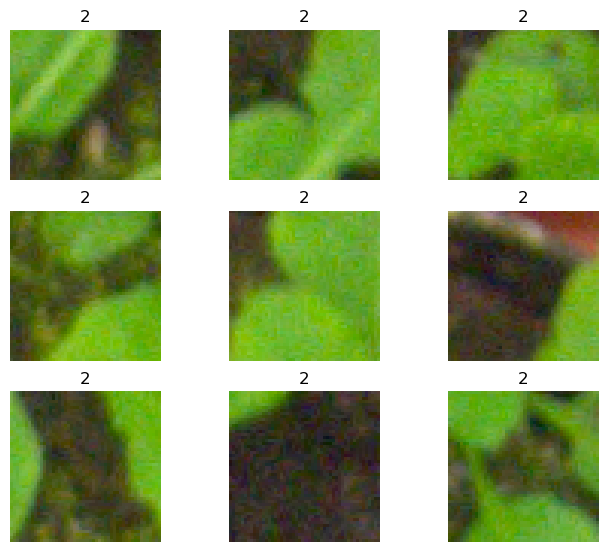

In [6]:
# show sample images for one labe (label_to_show)
annotated_images.show_sample(label_to_show="2")

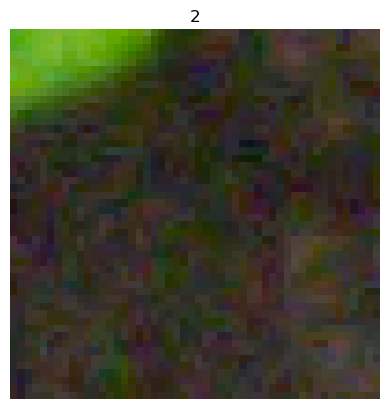

In [7]:
# show an image based on its index
annotated_images.show_patch("patch-300-300-350-350-#2014-06-06_plant001_rgb.png#.png")

[INFO] Type "exit", "end" or "stop" to exit.
[INFO] Showing 0-24 out of 139.


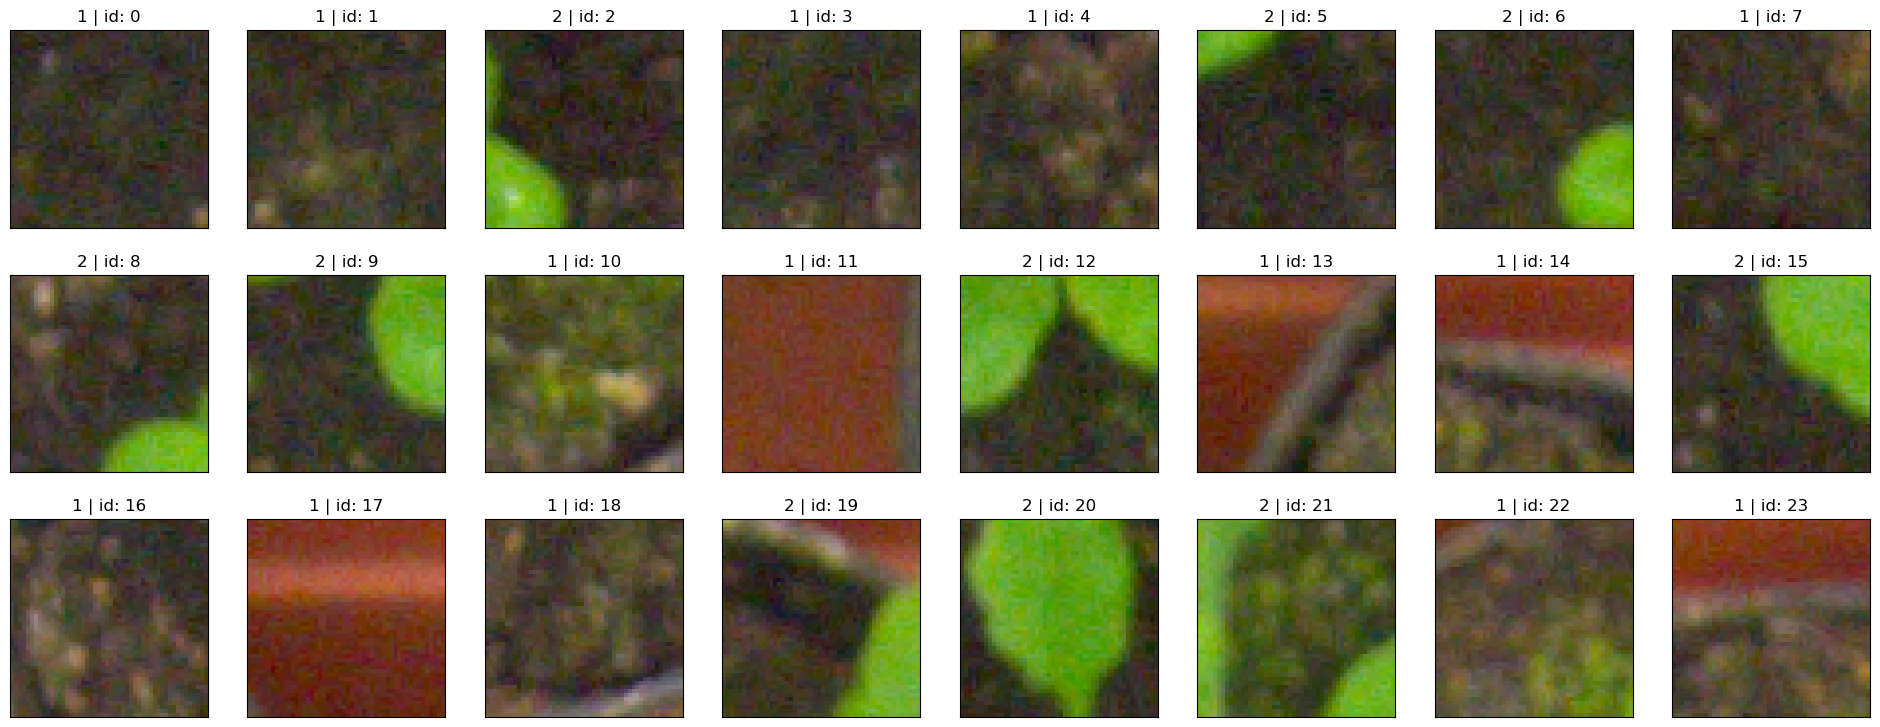

[INFO] IDs of current patches: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

Enter IDs, comma separated (or press enter to continue): exit
[INFO] Exited.


In [8]:
annotated_images.review_labels()

### Prepare datasets and dataloaders

In [15]:
annotated_images.create_datasets(frac_train=0.7, frac_val=0.2, frac_test=0.1)

[INFO] Number of annotations in each set:
        - Train:        97
        - Validate:     28
        - Test:         14


In [16]:
annotated_images.labels_map

{0: '1', 1: '2'}

In [17]:
dataloaders = annotated_images.create_dataloaders(batch_size=16)

[INFO] Using default sampler.


### Set up `ClassifierContainer`

#### Load a pretrained PyTorch model, dataloaders and labels map

In [18]:
from mapreader import ClassifierContainer

In [19]:
my_classifier = ClassifierContainer(model ="resnet18",
                                    labels_map={0: 'No', 1: 'plant'},
                                    dataloaders=dataloaders
                                    )

[INFO] Device is set to cpu
[INFO] Loaded "train" with 97 items.
[INFO] Loaded "val" with 28 items.
[INFO] Loaded "test" with 14 items.
[INFO] Initializing model.


In [20]:
my_classifier.labels_map

{0: 'No', 1: 'plant'}

[INFO] dataset: train
        - items:        97
        - batch size:   16
        - batches:      7


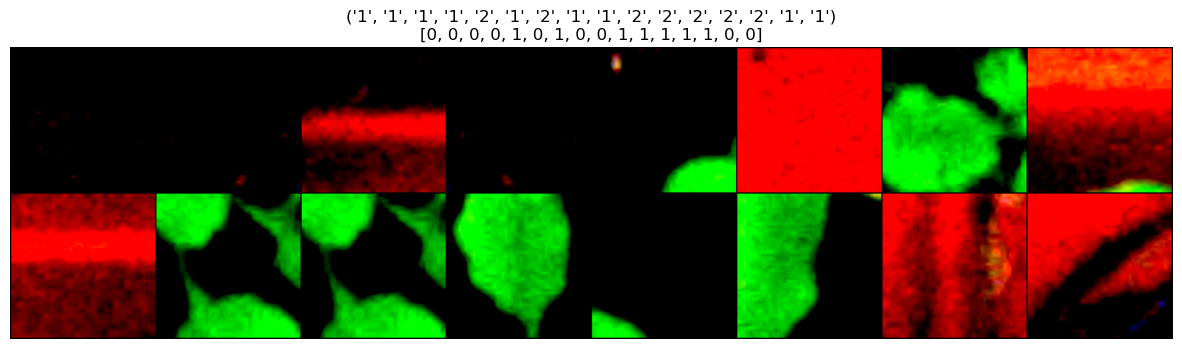

In [21]:
# show sample of transformed images
my_classifier.show_sample(set_name="train", batch_number=1)

In [22]:
my_classifier.model_summary()

Layer (type:depth-idx)                   Output Shape              Output Shape              Param #
ResNet                                   [16, 2]                   [16, 2]                   --
├─Conv2d: 1-1                            [16, 64, 112, 112]        [16, 64, 112, 112]        9,408
├─BatchNorm2d: 1-2                       [16, 64, 112, 112]        [16, 64, 112, 112]        128
├─ReLU: 1-3                              [16, 64, 112, 112]        [16, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [16, 64, 56, 56]          [16, 64, 56, 56]          --
├─Sequential: 1-5                        [16, 64, 56, 56]          [16, 64, 56, 56]          --
│    └─BasicBlock: 2-1                   [16, 64, 56, 56]          [16, 64, 56, 56]          --
│    │    └─Conv2d: 3-1                  [16, 64, 56, 56]          [16, 64, 56, 56]          36,864
│    │    └─BatchNorm2d: 3-2             [16, 64, 56, 56]          [16, 64, 56, 56]          128
│    │    └─ReLU: 3-3     

### Set up criterion, optimizer and scheduler

In [28]:
my_classifier.add_criterion()

[INFO] Using "CrossEntropyLoss()" as criterion.


In [29]:
my_classifier.initialize_optimizer()

In [30]:
my_classifier.initialize_scheduler()

### Train/fine-tune a model

In [31]:
my_classifier.train(
    num_epochs=10,
    tmp_file_save_freq=2,
    remove_after_load=False,
    print_info_batch_freq=5,
)

[INFO] Each training step will pass: ['train', 'val'].
2023-06-05 11:09:08 599-JY5FK6 [INFO] train    -- 1/10 --      16/97 ( 16.5% ) -- Loss: 0.771
2023-06-05 11:09:13 599-JY5FK6 [INFO] train    -- 1/10 --      96/97 ( 99.0% ) -- Loss: 0.939
2023-06-05 11:09:13 599-JY5FK6 [INFO] train    -- 1/10 -- Loss: 0.489; F_macro: 82.41; R_macro: 83.35
2023-06-05 11:09:14 599-JY5FK6 [INFO] val      -- 1/10 --      16/28 ( 57.1% ) -- Loss: 3.502
2023-06-05 11:09:14 599-JY5FK6 [INFO] val      -- 1/10 -- Loss: 2.994; F_macro: 78.12; R_macro: 84.21

2023-06-05 11:09:15 599-JY5FK6 [INFO] train    -- 2/10 --      16/97 ( 16.5% ) -- Loss: 1.931
2023-06-05 11:09:20 599-JY5FK6 [INFO] train    -- 2/10 --      96/97 ( 99.0% ) -- Loss: 0.023
2023-06-05 11:09:20 599-JY5FK6 [INFO] train    -- 2/10 -- Loss: 0.515; F_macro: 90.66; R_macro: 90.74
2023-06-05 11:09:21 599-JY5FK6 [INFO] val      -- 2/10 --      16/28 ( 57.1% ) -- Loss: 12.868
2023-06-05 11:09:21 599-JY5FK6 [INFO] val      -- 2/10 -- Loss: 12.950; F

In [32]:
list(my_classifier.metrics.keys())

['epoch_loss_train',
 'epoch_prec_micro_train',
 'epoch_recall_micro_train',
 'epoch_fscore_micro_train',
 'epoch_supp_micro_train',
 'epoch_rocauc_micro_train',
 'epoch_prec_macro_train',
 'epoch_recall_macro_train',
 'epoch_fscore_macro_train',
 'epoch_supp_macro_train',
 'epoch_rocauc_macro_train',
 'epoch_prec_weighted_train',
 'epoch_recall_weighted_train',
 'epoch_fscore_weighted_train',
 'epoch_supp_weighted_train',
 'epoch_rocauc_weighted_train',
 'epoch_prec_0_train',
 'epoch_recall_0_train',
 'epoch_fscore_0_train',
 'epoch_supp_0_train',
 'epoch_prec_1_train',
 'epoch_recall_1_train',
 'epoch_fscore_1_train',
 'epoch_supp_1_train',
 'epoch_loss_val',
 'epoch_prec_micro_val',
 'epoch_recall_micro_val',
 'epoch_fscore_micro_val',
 'epoch_supp_micro_val',
 'epoch_rocauc_micro_val',
 'epoch_prec_macro_val',
 'epoch_recall_macro_val',
 'epoch_fscore_macro_val',
 'epoch_supp_macro_val',
 'epoch_rocauc_macro_val',
 'epoch_prec_weighted_val',
 'epoch_recall_weighted_val',
 'epoch_fs

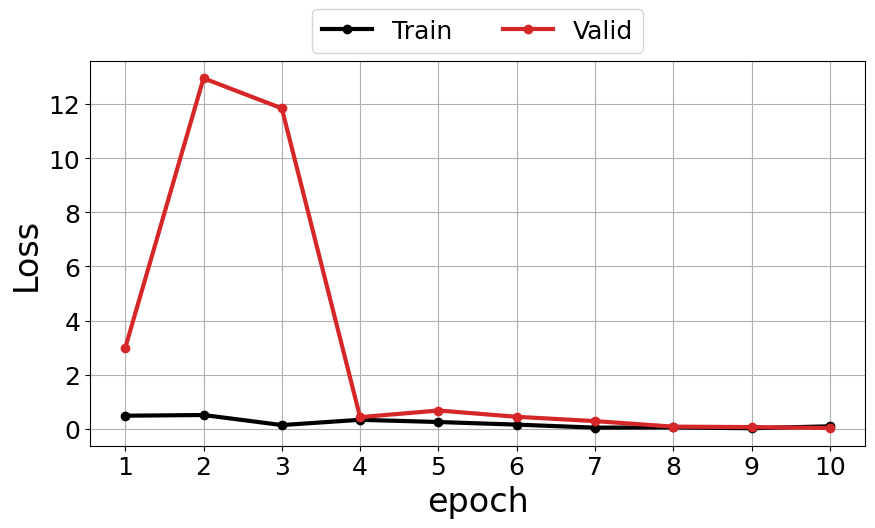

In [33]:
my_classifier.plot_metric(
    y_axis=["epoch_loss_train", "epoch_loss_val"],
    y_label="Loss",
    legends=["Train", "Valid"],
    colors=["k", "tab:red"],
)

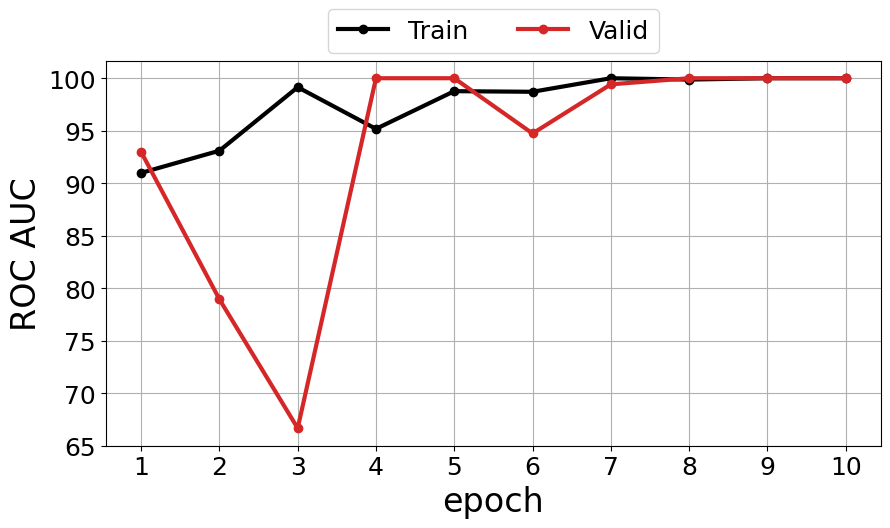

In [34]:
my_classifier.plot_metric(
    y_axis=["epoch_rocauc_macro_train", "epoch_rocauc_macro_val"],
    y_label="ROC AUC",
    legends=["Train", "Valid"],
    colors=["k", "tab:red"],
)

## Classify - Infer

https://mapreader.readthedocs.io/en/latest/User-guide/Classify.html

### Create dataset with all patches and add to ``ClassifierContainer``

In [53]:
# create dataframe from MapImages object
parent_df, patch_df = my_files.convert_images()
patch_df.head()

parent_id  \
image_id                                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   2014-06-06_plant001_rgb.png   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  2014-06-06_plant001_rgb.png   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   

                                                                                           image_path  \
image_id                                                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   

                                                          shape  \
image_id                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   (50, 50, 4)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  (50, 50, 4)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   

                                                         pixel_bounds  \
image_id                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png      (0, 0, 50, 50)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...   (0, 50, 50, 100)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (0, 100, 50, 150)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (0, 150, 50, 200)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (0, 200, 50, 250)   

                                                    mean_pixel_R  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.478751   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.811368   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.682626   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.630331   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.605075   

                                                    mean_pixel_G  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.453997   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.413255   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.314795   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.300660   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.351104   

                                                    mean_pixel_B  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.447296   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.238436   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.156773   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.159903   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.238678   

                                                    mean_pixel_A  std_pixel_R  \
image_id                                                                        
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png            1.0     0.046421   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...           1.0     0.131187   
patch-0-100-50-

In [54]:
from mapreader import PatchDataset

In [55]:
data = PatchDataset(patch_df, transform="val")

In [56]:
my_classifier.load_dataset(data, set_name="all_plants")

### Infer labels

In [57]:
my_classifier.inference("all_plants")

[INFO] Each training step will pass: ['all_plants'].
2023-06-05 11:10:58 599-JY5FK6 [INFO] all_plants -- 11/11 --     16/220 (  7.3% ) -- 
2023-06-05 11:11:01 599-JY5FK6 [INFO] all_plants -- 11/11 --     96/220 ( 43.6% ) -- 
2023-06-05 11:11:04 599-JY5FK6 [INFO] all_plants -- 11/11 --    176/220 ( 80.0% ) -- 
[INFO] Total time: 0m 7s


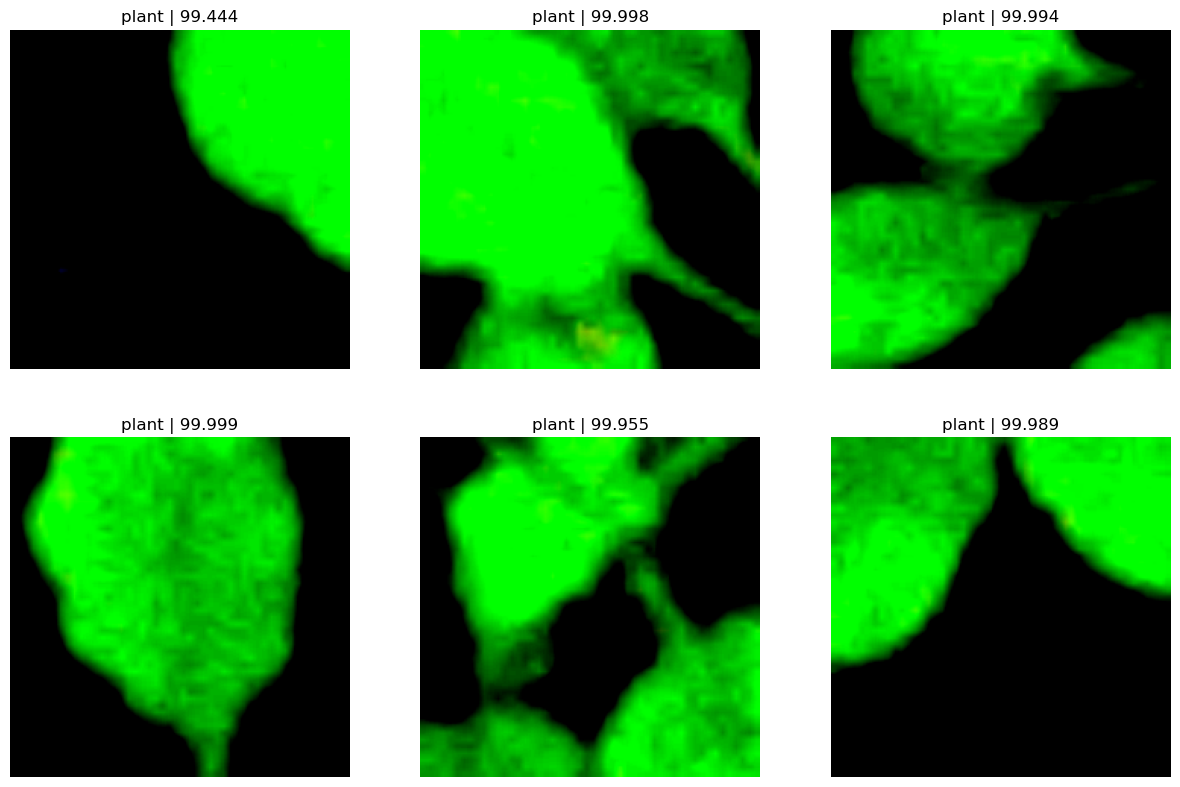

In [59]:
my_classifier.show_inference_sample_results(
    label="plant", set_name="all_plants", min_conf=99
)

### Add predictions to dataframe

In [60]:
predictions_df = data.patch_df

In [61]:
import numpy as np
import pandas as pd

predictions_df["predicted_label"] = my_classifier.pred_label
predictions_df["pred"] = my_classifier.pred_label_indices
predictions_df["conf"] = np.array(my_classifier.pred_conf).max(axis=1)

predictions_df.head()

parent_id  \
image_id                                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   2014-06-06_plant001_rgb.png   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  2014-06-06_plant001_rgb.png   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   

                                                                                           image_path  \
image_id                                                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   

                                                          shape  \
image_id                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   (50, 50, 4)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  (50, 50, 4)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   

                                                         pixel_bounds  \
image_id                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png      (0, 0, 50, 50)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...   (0, 50, 50, 100)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (0, 100, 50, 150)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (0, 150, 50, 200)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (0, 200, 50, 250)   

                                                    mean_pixel_R  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.478751   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.811368   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.682626   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.630331   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.605075   

                                                    mean_pixel_G  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.453997   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.413255   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.314795   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.300660   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.351104   

                                                    mean_pixel_B  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.447296   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.238436   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.156773   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.159903   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.238678   

                                                    mean_pixel_A  std_pixel_R  \
image_id                                                                        
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png            1.0     0.046421   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...           1.0     0.131187   
patch-0-100-50-

In [62]:
predictions_df.to_csv("./predictions_df.csv", sep=",", index_label="image_id")

### Add outputs to `MapImages` as metadata

In [63]:
my_files.add_metadata(predictions_df, tree_level="patch")

In [65]:
parent_df, patch_df = my_files.convert_images()
patch_df.head()

parent_id  \
image_id                                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   2014-06-06_plant001_rgb.png   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  2014-06-06_plant001_rgb.png   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   

                                                                                           image_path  \
image_id                                                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/worked_examples/non...   

                                                          shape  \
image_id                                                          
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png   (50, 50, 4)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...  (50, 50, 4)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (50, 50, 4)   

                                                         pixel_bounds  \
image_id                                                                
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png      (0, 0, 50, 50)   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...   (0, 50, 50, 100)   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...  (0, 100, 50, 150)   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...  (0, 150, 50, 200)   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...  (0, 200, 50, 250)   

                                                    mean_pixel_R  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.478751   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.811368   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.682626   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.630331   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.605075   

                                                    mean_pixel_G  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.453997   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.413255   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.314795   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.300660   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.351104   

                                                    mean_pixel_B  \
image_id                                                           
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png       0.447296   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...      0.238436   
patch-0-100-50-150-#2014-06-06_plant001_rgb.png...      0.156773   
patch-0-150-50-200-#2014-06-06_plant001_rgb.png...      0.159903   
patch-0-200-50-250-#2014-06-06_plant001_rgb.png...      0.238678   

                                                    mean_pixel_A  std_pixel_R  \
image_id                                                                        
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.png            1.0     0.046421   
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#...           1.0     0.131187   
patch-0-100-50-

In [66]:
parent_list = my_files.list_parents()

100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.34it/s]


[<Figure size 1500x1500 with 2 Axes>]

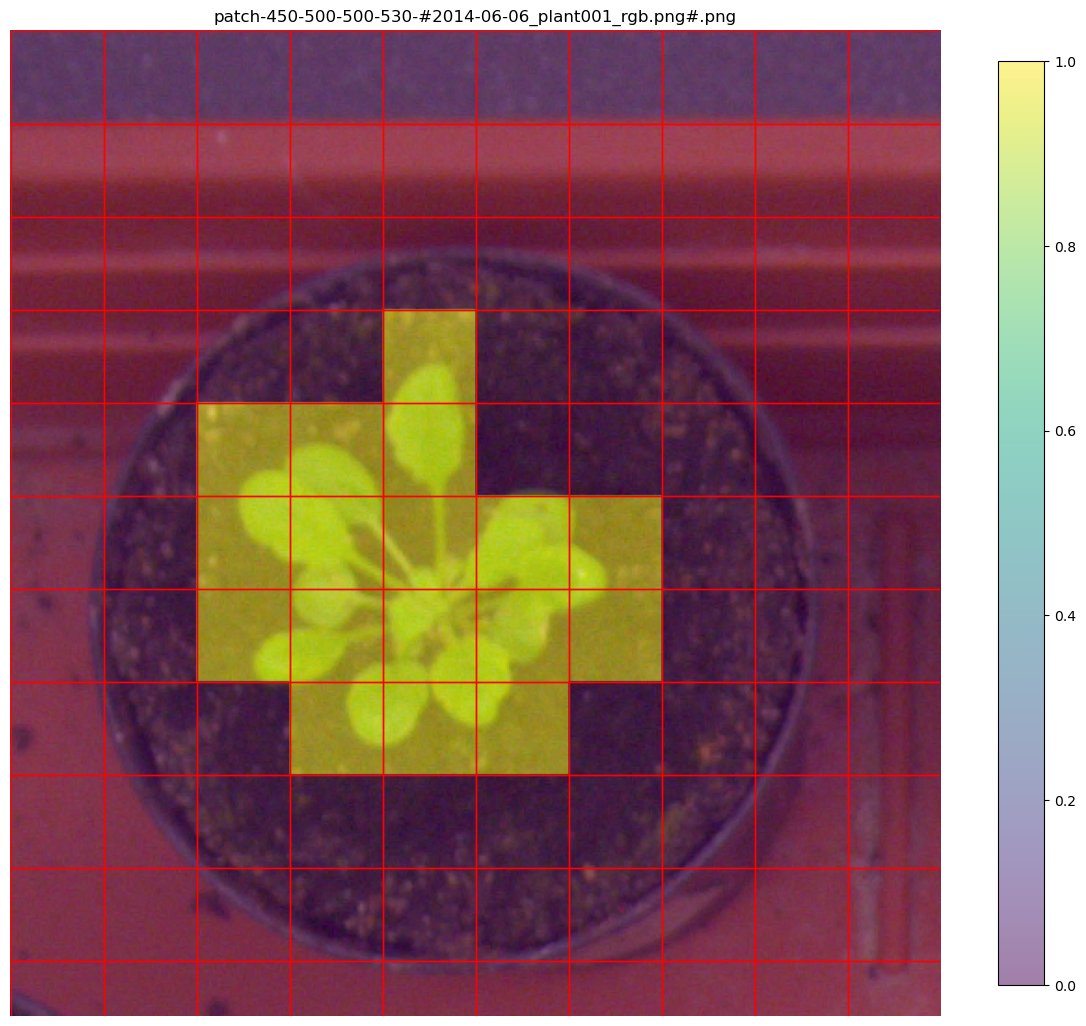

In [68]:
my_files.show_parent(
    parent_list[0],
    column_to_plot="pred",
    patch_border=True,
    plot_parent=True,
    figsize=(15, 15),
    alpha=0.5,
)

100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.60it/s]


[<Figure size 1500x1500 with 2 Axes>]

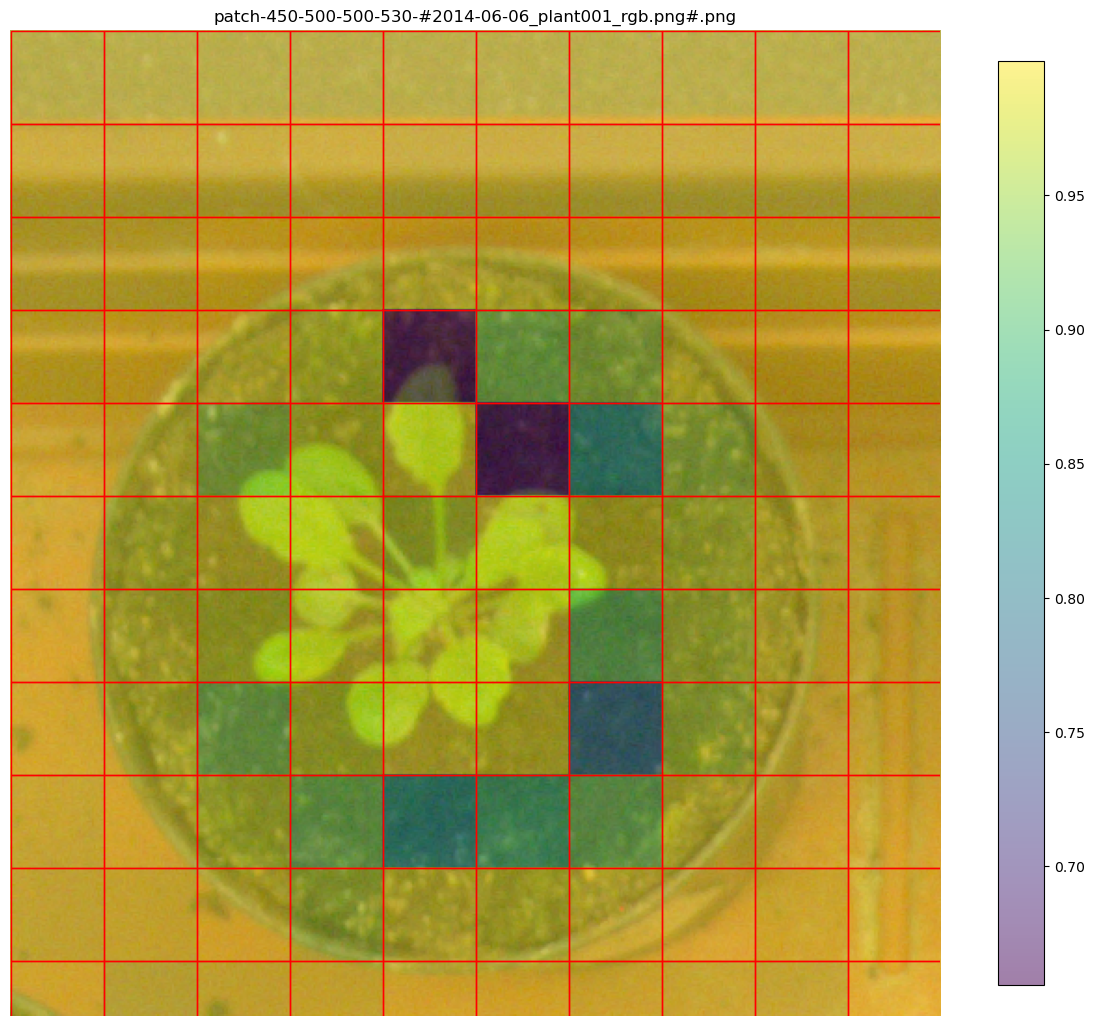

In [69]:
my_files.show_parent(
    parent_list[0],
    column_to_plot="conf",
    patch_border=True,
    plot_parent=True,
    figsize=(15, 15),
    alpha=0.5,
)